<a href="https://colab.research.google.com/github/Gnome101/MAT_421/blob/main/Homework_B_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import scipy interpolation methods
from scipy.interpolate import lagrange
#Import matplotlib
import matplotlib.pyplot as plt
#Change plot stlye
plt.style.use('seaborn-poster')
#Import numpy
import numpy as np

<ipython-input-1-848f12edbfe5>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


# 17.3 Lagrange Polynomial Interpolation

Langrange polynomial interpolation finds a single polynomial L(x) as an interpolation function.
The example below shows how you would find P for a function with 3 points. A difference between the Lagrange Polynomial Interpolation and the cubic one is taht it finds a single polynomial that goes through all the data points.

$P_1(x) = \frac{(x-x_2)(x-x_3)}{(x_1 - x_2)(x_1-x_3)} $

$P_2(x) = \frac{(x-x_1)(x-x_3)}{(x_2 - x_1)(x_2-x_3)} $

$P_3(x) = \frac{(x-x_1)(x-x_2)}{(x_3 - x_1)(x_3-x_2)} $



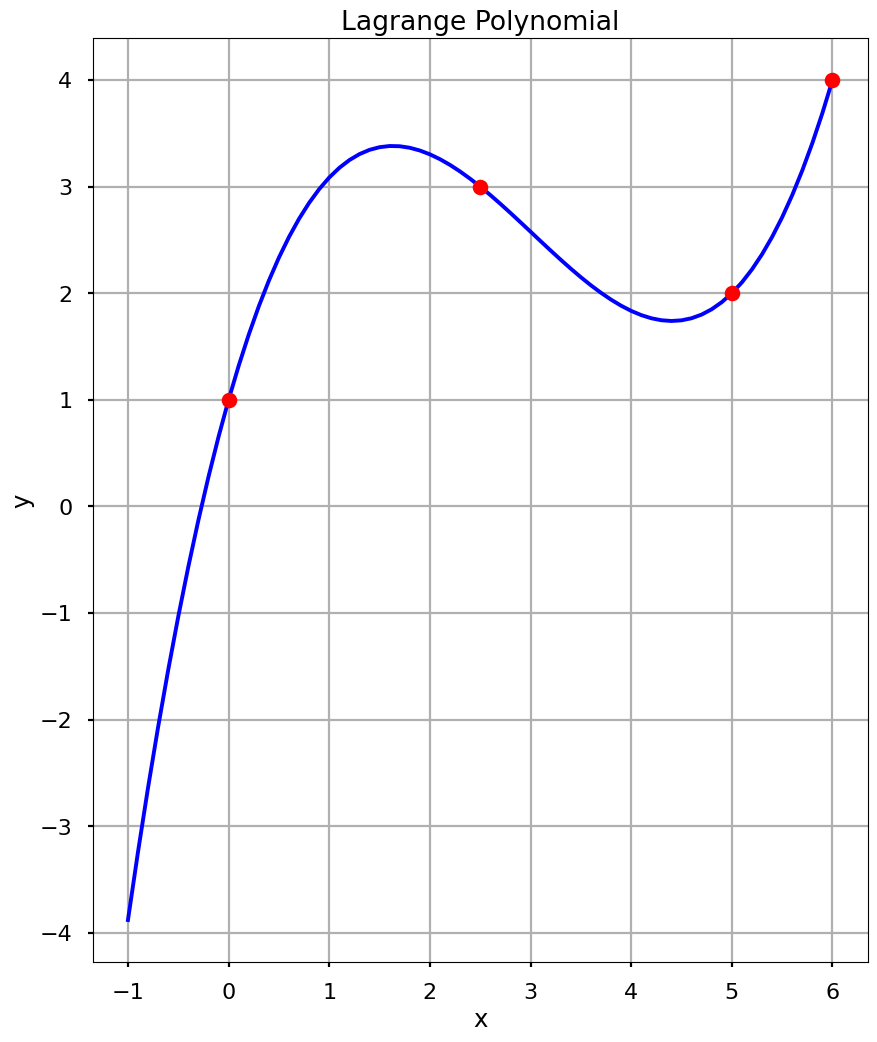

In [17]:
x = [0, 2.5, 5,6]
y = [1, 3, 2,4]
x_new = np.arange(-1.0, 6.1, 0.1)
f = lagrange(x,y)
fig = plt.figure(figsize = (10,12))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 17.4 Newton's Polynomial Interpolation

Newtons polynomial is another way to fix a polynomial for an exact set.
Its made up of divided differences between each of the data points.
The polynomial is expressed as
$P(x) = a_0 + a_1(x - x_0) + a_2(x-x_0)(x-x_1) + ... + a_n(x-x_0)(x-x_1)...(x-x_{n})$
The speciality of the method lies in how the points can be simply determined

For example

$f(x_0) = a_0 = y+0$

$f(x_1) = a_0 + a_1(x_1 - x_0)$
The divided differences make it so that adding new points doesn't change calculated ones.

In [3]:
#Below we will define two functions that will help us determine the newton polynomial
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

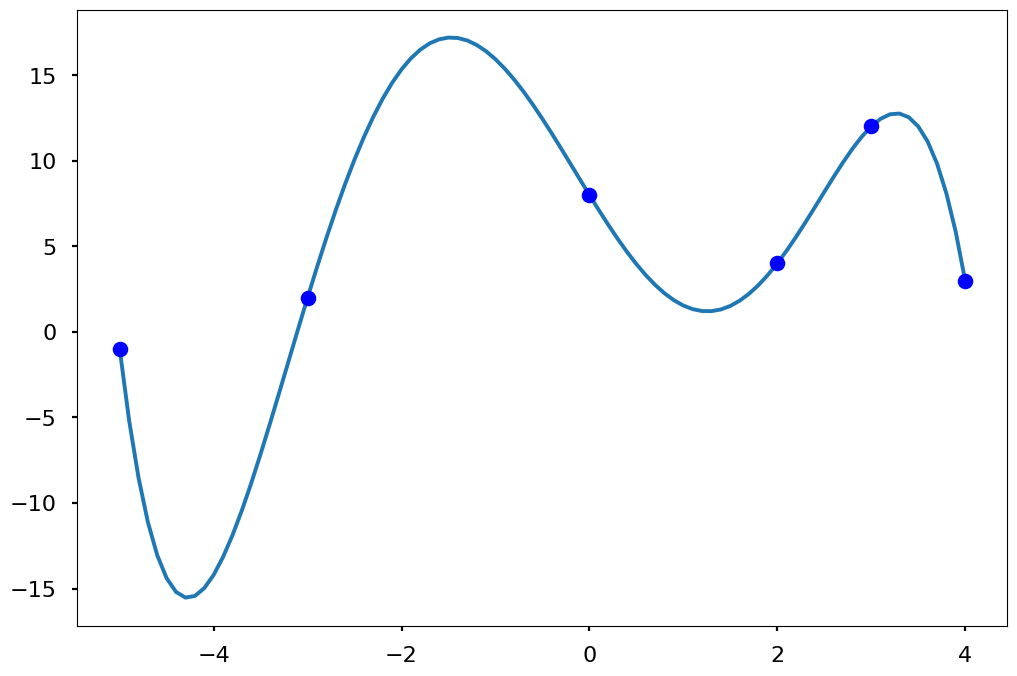

In [22]:
x = np.array([-5, -3, 0, 2,3,4])
y = np.array([-1, 2, 8, 4,12,3])
# get the divided difference coefficents
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 4.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x_new, y_new)
plt.plot(x, y, 'bo')